In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.stats as stats
import array as arr
import missingno as msno
#Have Pandas read file
df=pd.read_csv('/content/drive/MyDrive/diamond_inventory.csv')

<ipython-input-2-986fcd195c90>:10: DtypeWarning: Columns (11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/diamond_inventory.csv')


In [3]:
#Name and index dataframe
df.insert(0, 'Index', df.index)

In [4]:
df.columns

Index(['Index', 'StoneNo', 'Shape', 'Weight', 'Color', 'Clarity', 'Cut', 'Pol',
       'Sym', 'Flr.Intens', 'Loc', 'Lab', 'ReportNo', 'Discount',
       'Final Amount', 'Measurement', 'VIDEO', 'Certificate Link', 'IMAGE',
       'CA', 'CH', 'PA', 'PH', 'Type', 'TD%', 'TA%', 'Unnamed: 25'],
      dtype='object')

In [5]:
df.dtypes

,0
Index,int64
StoneNo,object
Shape,object
Weight,float64
Color,object
Clarity,object
Cut,object
Pol,object
Sym,object
Flr.Intens,object


In [6]:
#Check for duplicates
print(df.duplicated().value_counts())

False    185448
Name: count, dtype: int64


In [7]:
df = df.drop('Unnamed: 25', axis=1)

In [8]:
#Count NA instances
df.isna().sum(axis=0).sort_values(ascending=False).head(n=8)

,0
Type,142470
Cut,91882
IMAGE,42663
Flr.Intens,18343
VIDEO,12261
StoneNo,9680
Pol,8
Sym,8


<Axes: >

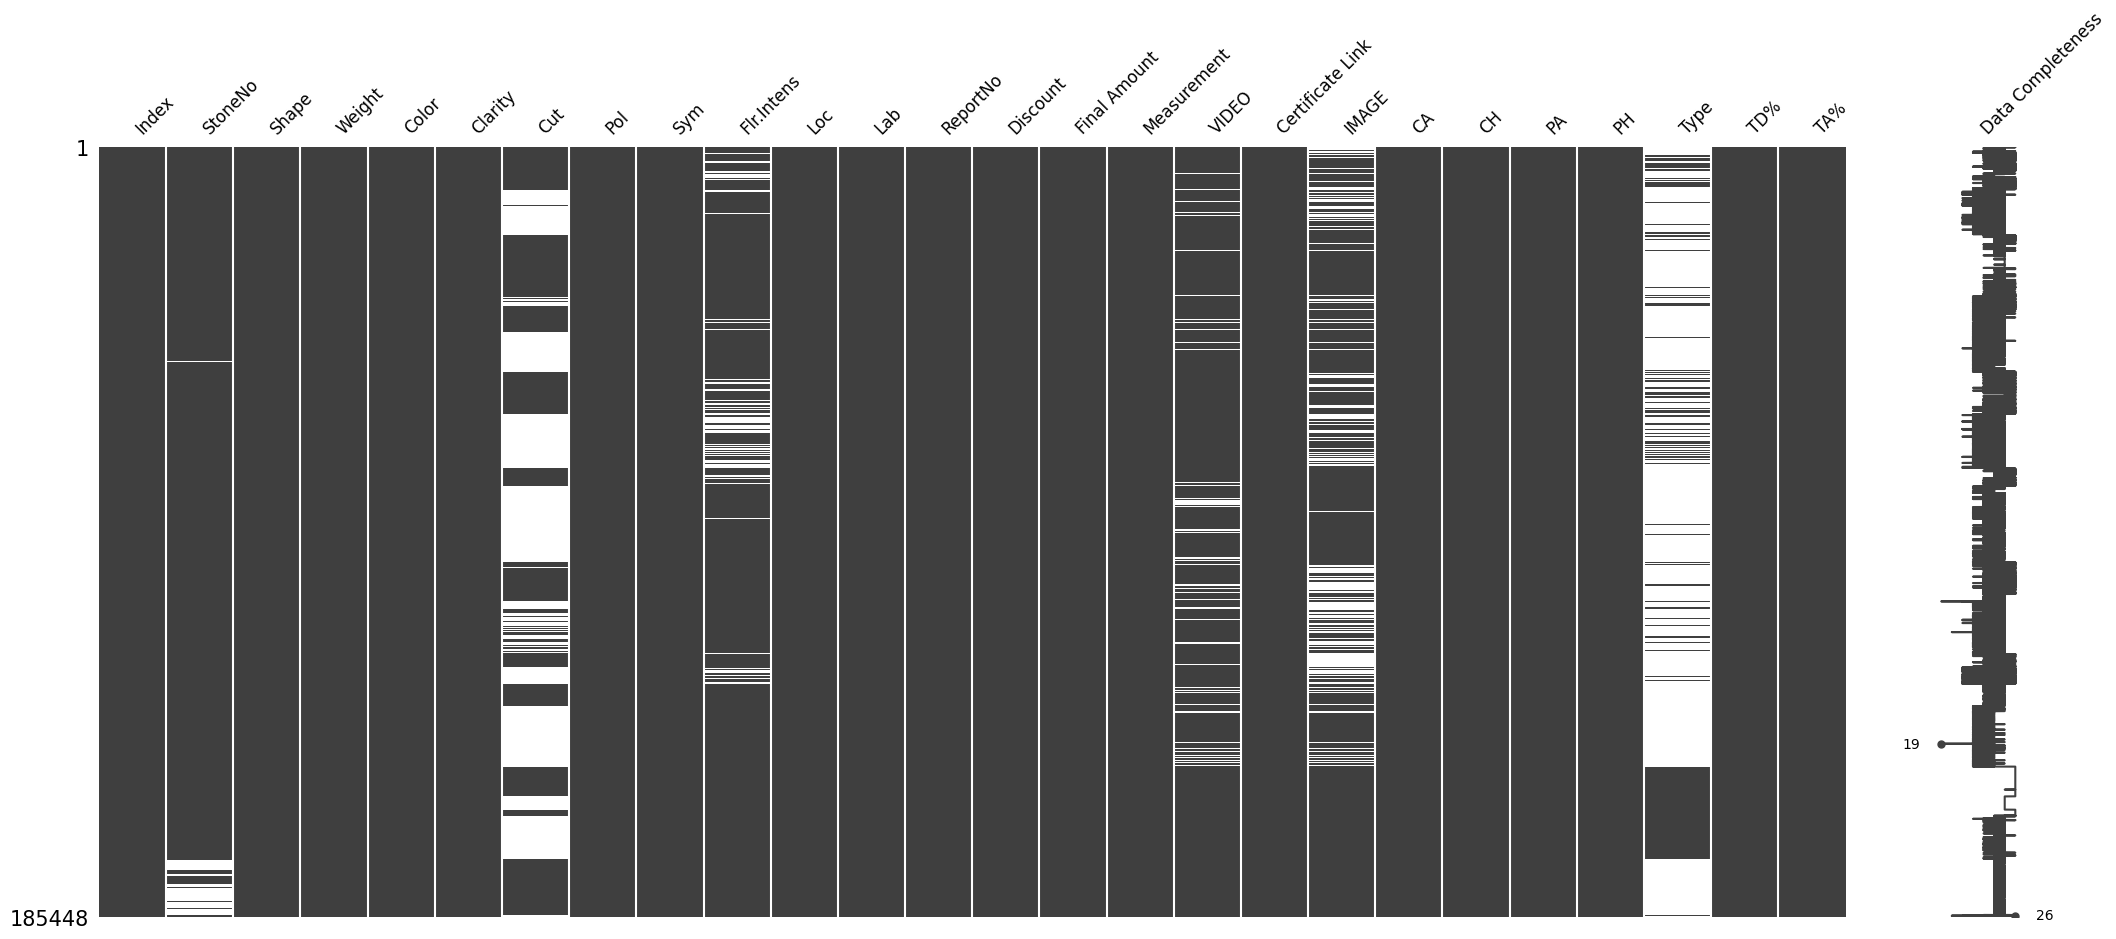

In [9]:
#Check for randomness in missing values
msno.matrix(df, fontsize = 12, labels=True)

In [10]:
print(df[df['Weight'] >= 3].count(axis=0).head(n=1))

Index    28416
dtype: int64


In [11]:
#remove smaller than 1 carat, and larger than 3 carats
a=(df['Index'].loc[df['Weight']>=3])
df=df.drop(a, axis=0, errors='ignore')
b=(df['Index'].loc[df['Weight']<1])
df=df.drop(b, axis=0, errors='ignore')

In [12]:
#Check for price and weight outliers
df[['Cost_zscore','Weight_zscore']]= stats.zscore(df[['Final Amount','Weight']]).abs()
print("Cost",df[df['Cost_zscore'] >= 3].count(axis=0).head(n=1))
print("Weight",df[df['Weight_zscore'] >= 3].count(axis=0).head(n=1))

Cost Index    2145
dtype: int64
Weight Index    100
dtype: int64


In [13]:
#look at outliers for cost
high_cost=df[df['Cost_zscore'] >= 3]
high_cost['Shape'].unique()

array(['ROUND', 'PRINCESS', 'PEAR', 'CUSHION', 'HEART', 'OVAL', 'EMERALD',
       'RADIANT', 'ASSCHER', 'MARQUISE', 'SQ RADIANT', 'TRIANGULAR',
       'Trap', 'EURCUT'], dtype=object)

In [14]:
plt=df['Shape'].groupby(high_cost['Shape']).count().sort_values(ascending=False)

<Axes: xlabel='Shape'>

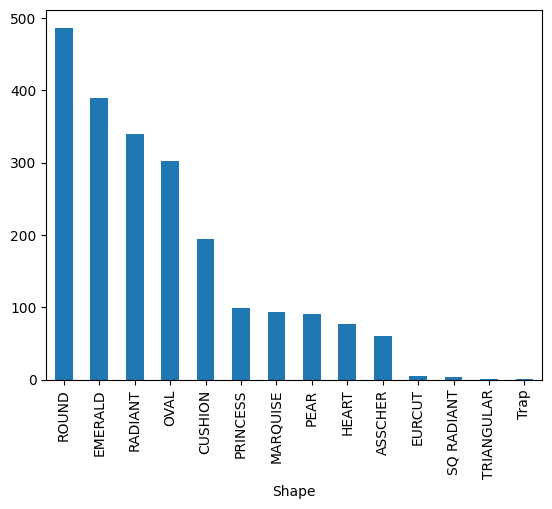

In [15]:
plt.plot.bar()

In [16]:

y= df['Final Amount'].groupby(df['Shape'])

In [ ]:
df.pivot_table(index=['Final Amount'],columns='Shape',aggfunc='size').plot(kind='bar')

In [ ]:
df.plot.bar().groupby(df['Shape'])

KeyboardInterrupt: 